In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./test_data.csv')
data

,Year,Month,QTY
0,2017,January,3473
1,2017,February,69960
2,2017,March,4670
3,2017,April,104441
4,2017,May,57471
...,...,...,...
79,2023,August,31032
80,2023,September,21464
81,2023,October,7507
82,2023,November,18509


In [236]:
data['Month']=data['Month'].replace('January',1)
data['Month']=data['Month'].replace('February',2)
data['Month']=data['Month'].replace('March',3)
data['Month']=data['Month'].replace('April',4)
data['Month']=data['Month'].replace('May',5)
data['Month']=data['Month'].replace('June',6)
data['Month']=data['Month'].replace('July',7)
data['Month']=data['Month'].replace('August',8)
data['Month']=data['Month'].replace('September',9)
data['Month']=data['Month'].replace('October',10)
data['Month']=data['Month'].replace('November',11)
data['Month']=data['Month'].replace('December',12)


In [237]:
data['Year']=data['Year'].astype(str)

In [238]:
data['Month']=data['Month'].astype(str)

In [239]:
data['Time']='1-' + data['Month'] + '-' +data['Year']

In [240]:
data

,Year,Month,QTY,Time
0,2017,1,3473,1-1-2017
1,2017,2,69960,1-2-2017
2,2017,3,4670,1-3-2017
3,2017,4,104441,1-4-2017
4,2017,5,57471,1-5-2017
...,...,...,...,...
79,2023,8,31032,1-8-2023
80,2023,9,21464,1-9-2023
81,2023,10,7507,1-10-2023
82,2023,11,18509,1-11-2023


In [241]:
data.drop(columns=['Month','Year'],inplace=True)
data

,QTY,Time
0,3473,1-1-2017
1,69960,1-2-2017
2,4670,1-3-2017
3,104441,1-4-2017
4,57471,1-5-2017
...,...,...
79,31032,1-8-2023
80,21464,1-9-2023
81,7507,1-10-2023
82,18509,1-11-2023


In [242]:
data.Time=pd.to_datetime(data['Time'],format='%d-%m-%Y')

In [243]:
data

,QTY,Time
0,3473,2017-01-01
1,69960,2017-02-01
2,4670,2017-03-01
3,104441,2017-04-01
4,57471,2017-05-01
...,...,...
79,31032,2023-08-01
80,21464,2023-09-01
81,7507,2023-10-01
82,18509,2023-11-01


In [244]:
data.set_index('Time',inplace=True)
data

,QTY
Time,
2017-01-01,3473
2017-02-01,69960
2017-03-01,4670
2017-04-01,104441
2017-05-01,57471
...,...
2023-08-01,31032
2023-09-01,21464
2023-10-01,7507


<Axes: xlabel='Time'>

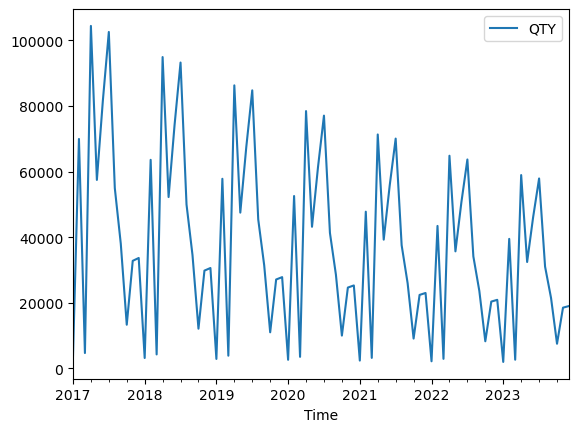

In [245]:
data.plot()

In [260]:
print(data)
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.QTY, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

               QTY  rolling_mean_diff  forecast
Time                                           
2017-01-01    3473                NaN       NaN
2017-02-01   69960                NaN       NaN
2017-03-01    4670                NaN       NaN
2017-04-01  104441                NaN       NaN
2017-05-01   57471                NaN       NaN
...            ...                ...       ...
2023-08-01   31032        -258.666667       NaN
2023-09-01   21464        -178.916667       NaN
2023-10-01    7507         -62.583333       NaN
2023-11-01   18509        -154.250000       NaN
2023-12-01   19000        -158.333333       NaN

[84 rows x 3 columns]
1. ADF :  -20231.95672675823
2. P-Value :  0.0
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 72
5. Critical Values :
	 1% :  -3.524624466842421
	 5% :  -2.9026070739026064
	 10% :  -2.5886785262345677


In [261]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['QTY'],order=(12,1,1))
history=model.fit()

C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [262]:
history.summary()


C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    QTY   No. Observations:                   84
Model:                ARIMA(12, 1, 1)   Log Likelihood                 -43.378
Date:                Wed, 15 May 2024   AIC                            114.756
Time:                        15:09:02   BIC                            148.620
Sample:                    01-01-2017   HQIC                           128.361
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -9.8839   1.35e-07   -7.3e+07      0.000      -9.884      -9.884
ar.L2        -43.0731   6.59e-07  -6.53e+07      0.000     -43.073     -43.073
ar.L3       -106.8738   1.41e-06  -7.58e+07      0.000    -106.874    -106.874
ar.L4       -159.4320   1.81e-06  -8.83e+07      0.000    -159.432    -159.432
ar.L5       -127.0891   3.53e-07   -3.6e+08      0.000    -127.089    -127.089
ar.L6          0.0800   1.56e-09   5.12e+07      0.000       0.080       0.080
ar.L7        127.1810   6.49e-08   1.96e+09      0.000     127.181     127.181
ar.L8        159.4041   1.19e-06   1.34e+08      0.000     159.404     159.404
ar.L9        106.7975   7.99e-07   1.34e+08      0.000     106.798     106.798
ar.L10        43.0230   4.35e-07   9.88e+07      0.000      43.023      43.023
ar.L11         9.8682   1.89e-07   5.22e+07      0.000       9.868       9.868
ar.L12         0.9980   1.44e-08   6.95e+07      0.000       0.998       0.998
ma.L1         -0.9971   1.93e-08  -5.17e+07      0.000      -0.997      -0.997
sigma2        89.3739   2.09e-06   4.28e+07      0.000      89.374      89.374
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             22153.92
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                             8.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Time'>

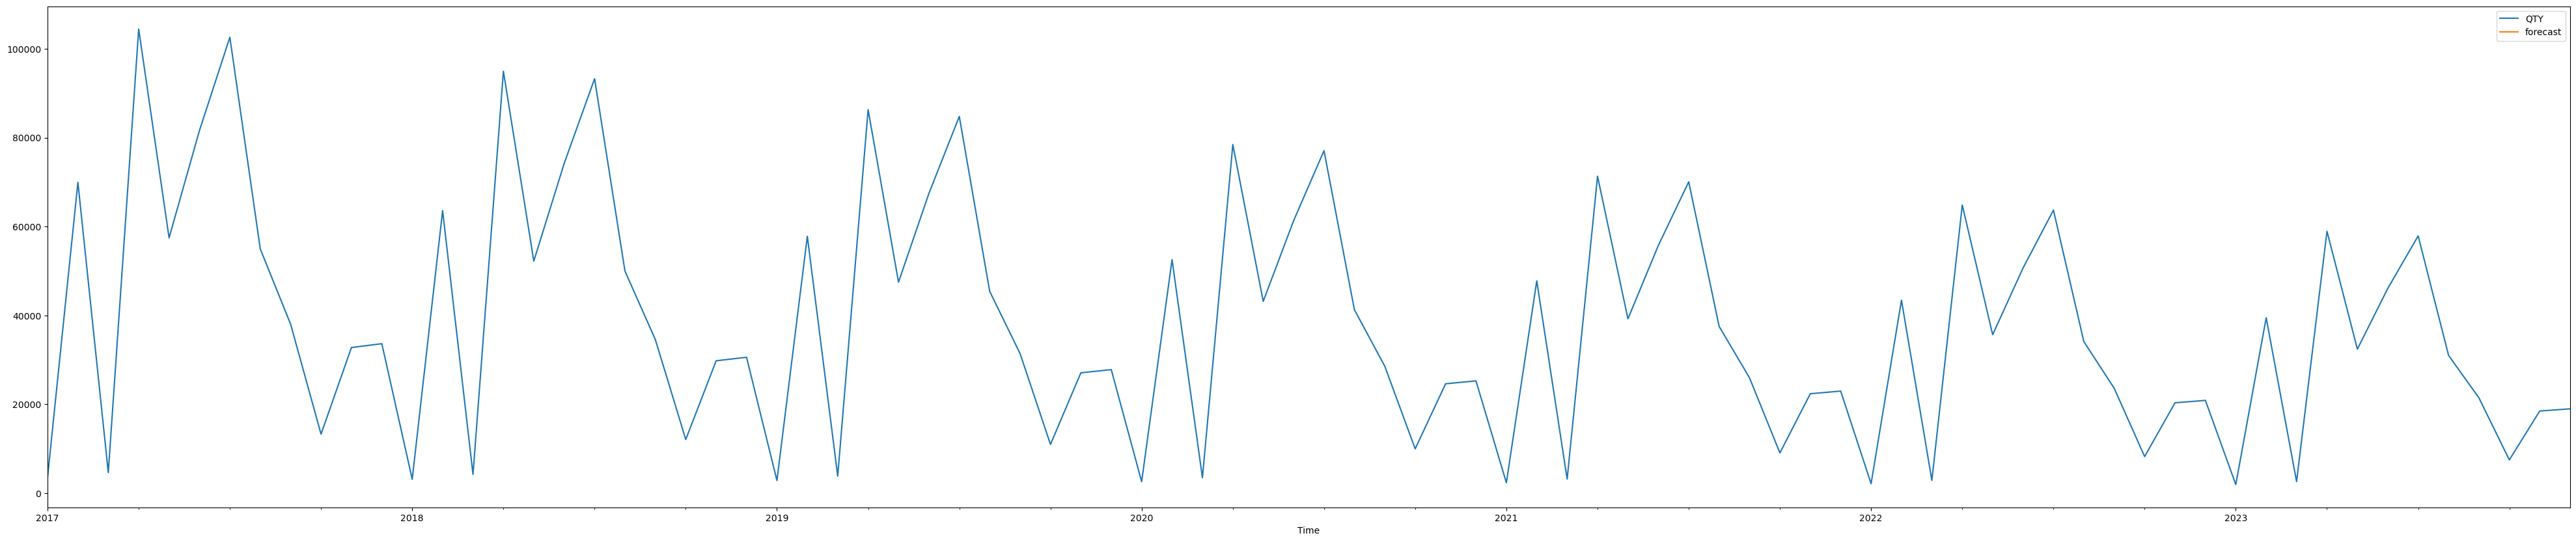

In [263]:
forecast = history.forecast(steps=12)  # Adjust the number of forecast steps as needed

# Assign the forecast to the DataFrame
data['forecast'] = forecast

# Plot the results
data[['QTY', 'forecast']].plot(figsize=(50, 10))

In [264]:
data

,QTY,rolling_mean_diff,forecast
Time,,,
2017-01-01,3473,NaN,NaN
2017-02-01,69960,NaN,NaN
2017-03-01,4670,NaN,NaN
2017-04-01,104441,NaN,NaN
2017-05-01,57471,NaN,NaN
...,...,...,...
2023-08-01,31032,-258.666667,NaN
2023-09-01,21464,-178.916667,NaN
2023-10-01,7507,-62.583333,NaN


In [265]:
df=data
#df.drop('rolling_mean_diff')
#df.drop('forecast')
df

,QTY,rolling_mean_diff,forecast
Time,,,
2017-01-01,3473,NaN,NaN
2017-02-01,69960,NaN,NaN
2017-03-01,4670,NaN,NaN
2017-04-01,104441,NaN,NaN
2017-05-01,57471,NaN,NaN
...,...,...,...
2023-08-01,31032,-258.666667,NaN
2023-09-01,21464,-178.916667,NaN
2023-10-01,7507,-62.583333,NaN


In [266]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
#!pip install pmdarima -q
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose


SARIMAX_model = pm.auto_arima(df['QTY'], exogenous=df.index,
                        start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1,
                        trace=False,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)


def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"Time": pd.date_range(df.index[-1], periods=n_periods, freq='MS').month},
                            index=pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS'))
    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_df['Time'])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(df["QTY"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Army Canteen Sales")
    plt.show()
    return fitted_series

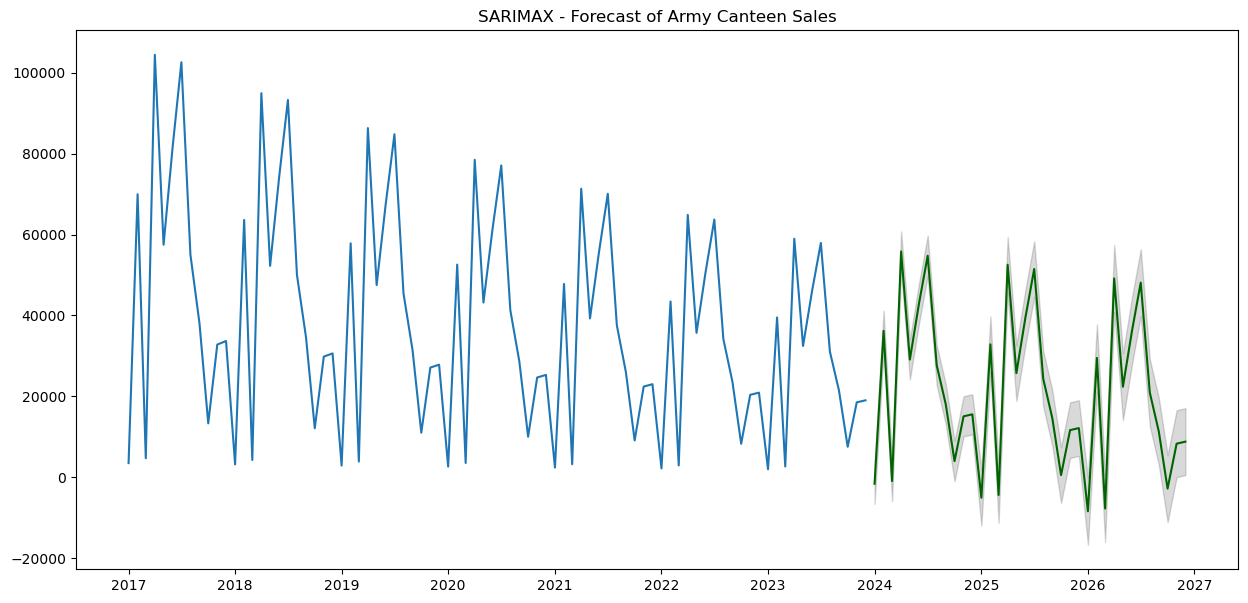

2024-01-01    -1637.249725
2024-02-01    36186.359478
2024-03-01     -955.956580
2024-04-01    55801.661219
2024-05-01    29081.219986
2024-06-01    42826.920290
2024-07-01    54753.538134
2024-08-01    27663.233342
2024-09-01    18020.385131
2024-10-01     3954.154383
2024-11-01    15042.213860
2024-12-01    15537.050781
2025-01-01    -5093.896679
2025-02-01    32843.774075
2025-03-01    -4410.535769
2025-04-01    52518.249990
2025-05-01    25717.207538
2025-06-01    39504.363070
2025-07-01    51466.965584
2025-08-01    24294.967403
2025-09-01    14623.033087
2025-10-01      514.375677
2025-11-01    11635.866342
2025-12-01    12132.192331
2026-01-01    -8441.987952
2026-02-01    29481.106252
2026-03-01    -7758.890300
2026-04-01    49148.020655
2026-05-01    22357.277439
2026-06-01    36139.135544
2026-07-01    48097.139762
2026-08-01    20935.582145
2026-09-01    11267.364122
2026-10-01    -2835.870713
2026-11-01     8281.347488
2026-12-01     8777.483051
Freq: MS, dtype: float64


In [267]:
print(sarimax_forecast(SARIMAX_model, periods=36))


In [234]:
data

,QTY,rolling_mean_diff,forecast
Time,,,
2017-01-01,3473,NaN,NaN
2017-02-01,69960,NaN,NaN
2017-03-01,4670,NaN,NaN
2017-04-01,104441,NaN,NaN
2017-05-01,57471,NaN,NaN
...,...,...,...
2023-08-01,31032,-258.666667,NaN
2023-09-01,21464,-178.916667,NaN
2023-10-01,7507,-62.583333,NaN


In [268]:
data

,QTY,rolling_mean_diff,forecast
Time,,,
2017-01-01,3473,NaN,NaN
2017-02-01,69960,NaN,NaN
2017-03-01,4670,NaN,NaN
2017-04-01,104441,NaN,NaN
2017-05-01,57471,NaN,NaN
...,...,...,...
2023-08-01,31032,-258.666667,NaN
2023-09-01,21464,-178.916667,NaN
2023-10-01,7507,-62.583333,NaN


In [269]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

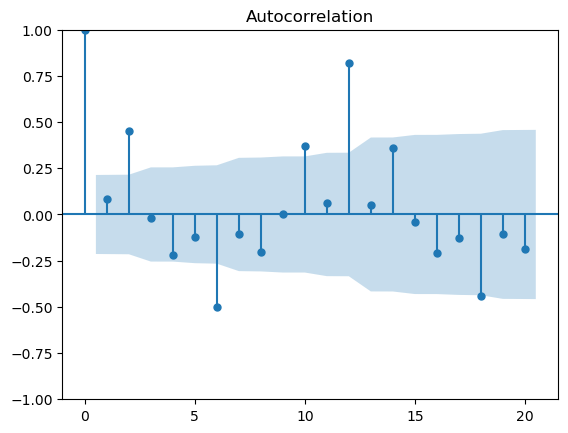

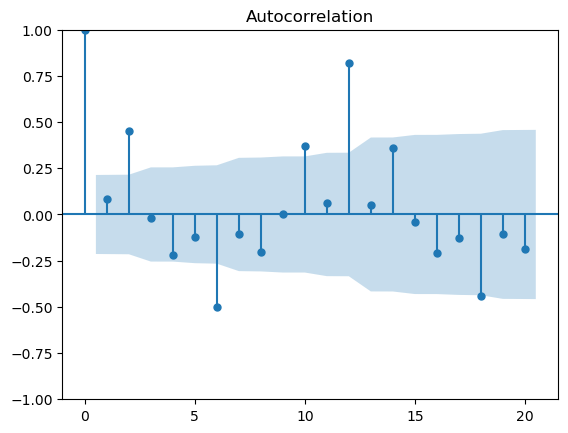

In [271]:
plot_acf(data['QTY'])

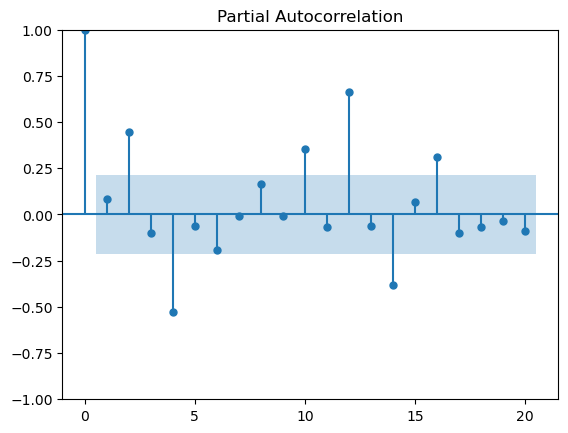

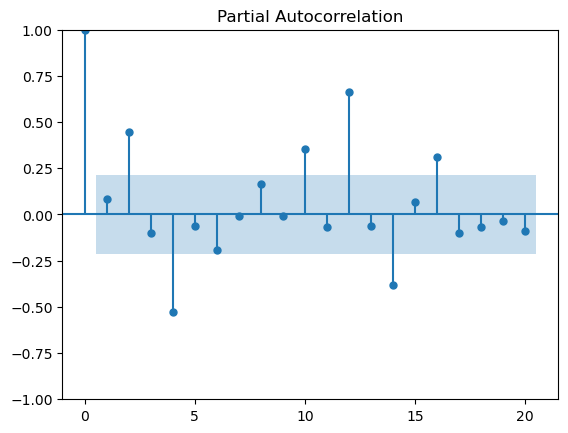

In [272]:
plot_pacf(data['QTY'])

C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Parth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


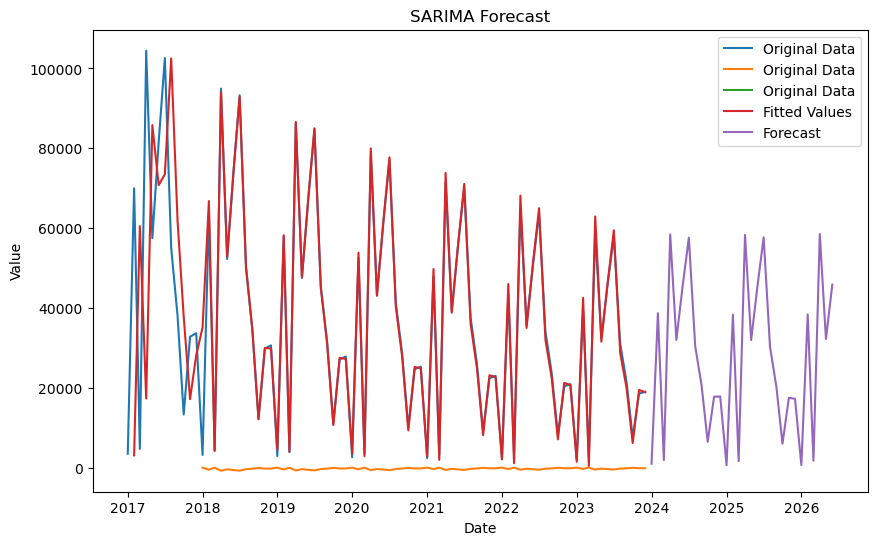

2024-01-01      966.767428
2024-02-01    38657.479359
2024-03-01     1860.948634
2024-04-01    58411.506662
2024-05-01    31979.644790
2024-06-01    45612.370279
2024-07-01    57607.304716
2024-08-01    30417.240621
2024-09-01    20614.054243
2024-10-01     6447.930709
2024-11-01    17742.226964
2024-12-01    17806.120968
2025-01-01      590.654145
2025-02-01    38319.517458
2025-03-01     1603.975809
2025-04-01    58304.775851
2025-05-01    31941.636954
2025-06-01    45564.947055
2025-07-01    57679.291748
2025-08-01    30262.621357
2025-09-01    20289.067534
2025-10-01     5970.622506
2025-11-01    17477.552304
2025-12-01    17230.887915
2026-01-01      609.931640
2026-02-01    38366.510559
2026-03-01     1709.852996
2026-04-01    58519.866635
2026-05-01    32206.688079
2026-06-01    45823.152539
Freq: MS, Name: predicted_mean, dtype: float64


In [280]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generate example time series data
np.random.seed(0)
#date_range = pd.date_range(start='2022-01-01', periods=365)
#data = pd.Series(np.random.normal(loc=0, scale=1, size=len(date_range)), index=date_range)

# Fit SARIMA model
model = SARIMAX(data['QTY'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(results.predict(start=data.index[1], end=data.index[-1]), label='Fitted Values')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

print(forecast)

In [277]:
data

,QTY,rolling_mean_diff,forecast
Time,,,
2017-01-01,3473,NaN,NaN
2017-02-01,69960,NaN,NaN
2017-03-01,4670,NaN,NaN
2017-04-01,104441,NaN,NaN
2017-05-01,57471,NaN,NaN
...,...,...,...
2023-08-01,31032,-258.666667,NaN
2023-09-01,21464,-178.916667,NaN
2023-10-01,7507,-62.583333,NaN
